### OpenFlexure delta stage for 2 Photon microscopy
#### this notebook has a fast analysis on our first test

Within a position: 
- Check max values on each frame and their location.
 - check how much these max values change over time on the same position
 - calculate residuals 

After a jump:
- the same as each position

--- 

data organization (name convention and order of the recordings):  
stage_pos1_1 = 1st recording on position 1  
stage_posx100_1 = 1st recording after a displacement of 100 units on the xmotor (this is a delta stage, so moving the x motor gives a displacement in x and y)  
stage_pos1_2 = 2nd recording on position 1  
stage_posx100_2 = 2nd recording after a displacement of 100 units on the xmotor (this is a delta stage, so moving the x motor gives a displacement in x and y)  
stage_pos1_3 = 3rd recording on position 1  
stage_posx1000_1 = 1st recording after a displacement of 1000 units on the xmotor (this is a delta stage, so moving the x motor gives a displacement in x and y)  
stage_pos1_4 = 4th recording on position 1  
stage_posx1000_2 = 2nd recording after a displacement of 1000 units on the xmotor (this is a delta stage, so moving the x motor gives a displacement in x and y)  
stage_pos1_5 = 5th recording on position 1  





---

In [2]:
import pandas as pd
#from PIL import Image
import os
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from scipy import signal

In [5]:
#filePath = "C:\\Users\\Andre Maia Chagas\\Documents\\GitHub\\open2p\\substage\\test_data\\"
filePath = "..//test_data//"
fileList = os.listdir(filePath)
print(fileList)

['stage_pos1_1.tif', 'stage_pos1_2.tif', 'stage_pos1_3.tif', 'stage_pos1_4.tif', 'stage_pos1_5.tif', 'stage_posx100_1.tif', 'stage_posx100_2.tif', 'stage_posx1k_1.tif', 'stage_posx1k_2.tif']


In [40]:

allRec = list()
for item in fileList:
    allRec.append(io.imread(filePath+item))

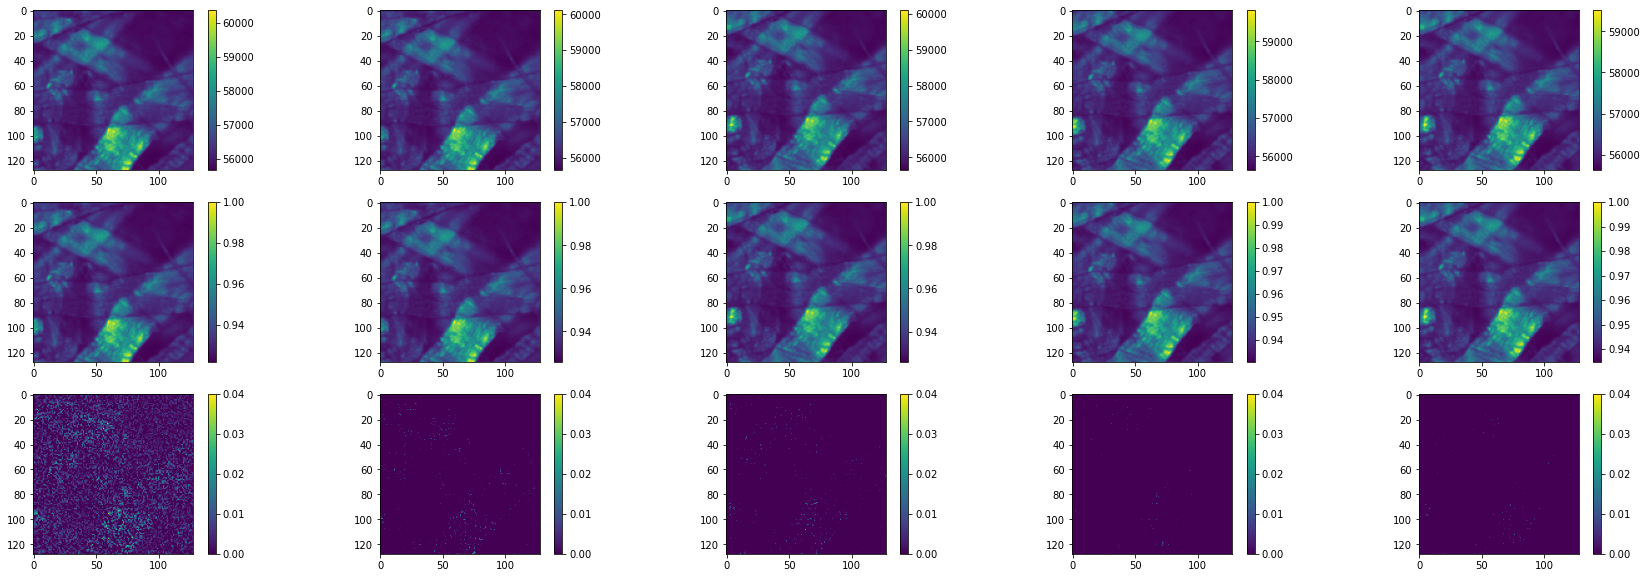

In [95]:
allAve = list()
for item in allRec:
    allAve.append( np.mean(item,axis=0))

fig = plt.figure(figsize = (30,10))
for i in range(5):
    plt.subplot(3,5,i+1)
    plt.imshow(allAve[i])
    plt.colorbar()
    plt.subplot(3,5,(i+1)+5)
    plt.imshow(allAve[i]/np.max(allAve[i]))
    plt.colorbar()
    plt.subplot(3,5,(i+1)+10)
    plt.imshow(allRec[i][1]/np.max(allRec[i][1])-allRec[i][-1]/np.max(allRec[i][-11]),vmin=0,vmax=0.04)
    plt.colorbar()
fig.savefig(fname=".//within_recordings.png",dpi=600)

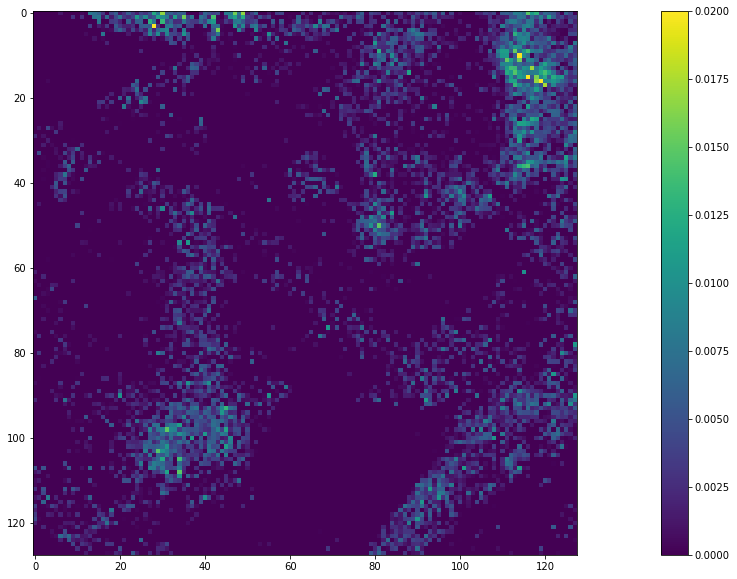

In [109]:
## pairwise comparison between recordings.
## here just doing a comparison between first and last
fig = plt.figure(figsize = (30,10))
frame1 = np.mean(allRec[0]/np.max(allRec[0],axis=0),axis=0)
frame2 = np.mean(allRec[-1]/np.max(allRec[-1],axis=0),axis=0)
plt.imshow(frame1-frame2,vmin=0,vmax=0.02)
plt.colorbar()
fig.savefig(fname="..//between_recording.png",dpi=300)

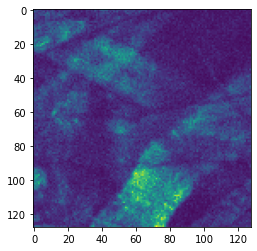

In [8]:
plt.imshow(im[199])

In [106]:
test = signal.correlate(allAve[1],allAve[-1], mode='full',method="fft")
#test1 = signal.correlate(im[1],im[199], mode='full')

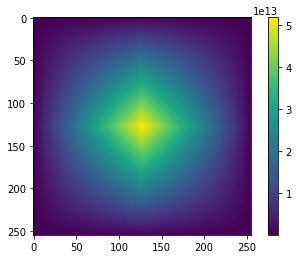

In [108]:
plt.imshow(test)
plt.colorbar()

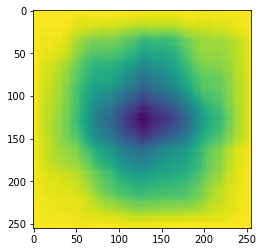

In [12]:
plt.imshow(np.subtract(test1,test))

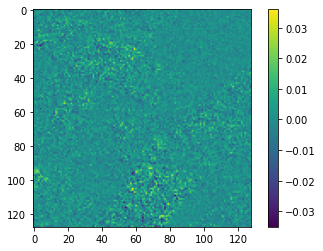

In [31]:
fig = plt.figure()
difference = (im[1]-im[199])

plt.imshow(difference)
plt.colorbar()#boundaries=[-0.05,0.05])

In [17]:
np.std(difference)

0.0060342257

In [18]:
np.max(difference),np.min(difference)

(0.035989463, -0.03512615)

(array([   9.,   24.,  170., 1204., 6578., 6623., 1436.,  285.,   44.,
          11.]),
 array([-0.03512615, -0.02801459, -0.02090303, -0.01379147, -0.0066799 ,
         0.00043166,  0.00754322,  0.01465478,  0.02176634,  0.0288779 ,
         0.03598946], dtype=float32),
 <BarContainer object of 10 artists>)

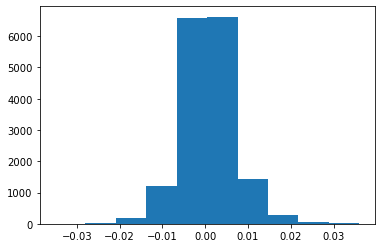

In [19]:
plt.hist(difference.flatten())

(array([6.036e+03, 5.691e+03, 2.389e+03, 1.084e+03, 6.340e+02, 3.100e+02,
        1.540e+02, 5.700e+01, 2.500e+01, 4.000e+00]),
 array([0.8873149 , 0.89663607, 0.9059572 , 0.9152783 , 0.92459947,
        0.9339206 , 0.9432418 , 0.9525629 , 0.961884  , 0.9712052 ,
        0.9805263 ], dtype=float32),
 <BarContainer object of 10 artists>)

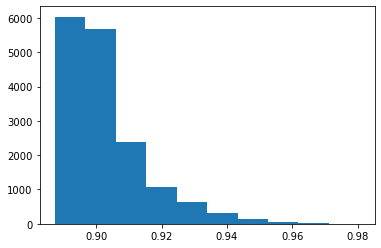

In [20]:
plt.hist(im[1].flatten())